# Unevenly Spaced Data

In [11]:
using Multitaper, Plots, FINUFFT

The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [2]:
N = 500
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u = Multitaper.gpss_orth(W, K, t, f0);

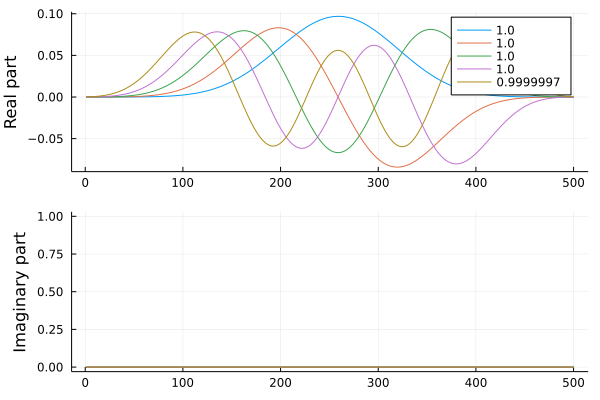

In [3]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

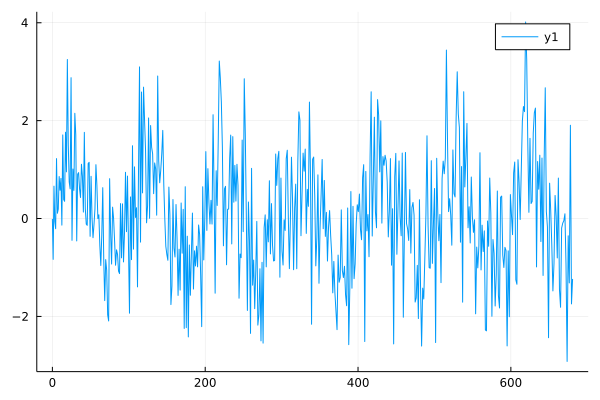

In [4]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

In [5]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))/N;

In [6]:
Sb = bspec(t, x[:,1], W, K, 0.5, 0.0, false)

MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.48, 0.482, 0.484, 0.48600000000000004, 0.488, 0.49, 0.492, 0.494, 0.49599999999999994, 0.498], [0.10589098429565307, 0.140037492371848, 0.5474143841923782, 3.700131320591818, 4.59560875155117, 4.6252064276274, 4.528254893698267, 4.149473518659337, 0.6044102850942776, 0.21990294543201552  …  0.13812292917947108, 0.1256177420795589, 0.12885030642971107, 0.10269384221725604, 0.1023672352744505, 0.04956551158811011, 0.06352999385132803, 0.08699442047910098, 0.08842712923408726, 0.16217079603993284], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.25543237325781554 - 2.973086078975303e-17im 0.06819557887640391 + 6.288300646399861e-17im … -0.23197262188684686 - 4.7475397169974537e-17im 0.3444191784598417 - 9.103224082346837e-17im; 0.06972294320249682 - 0.33722995300697906im -0.19086397357565454 + 0.11940063662116776im … 

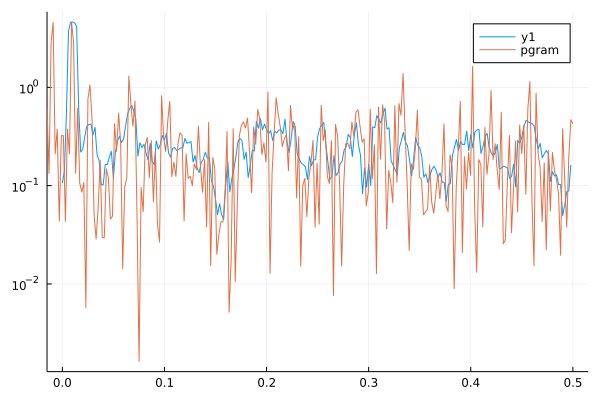

In [7]:
plot(Sb.f, Sb.S, xlims = [0.0, 0.5])
plot!(freq/(2*pi), Pxx/4, yscale = :log10, label = "pgram")

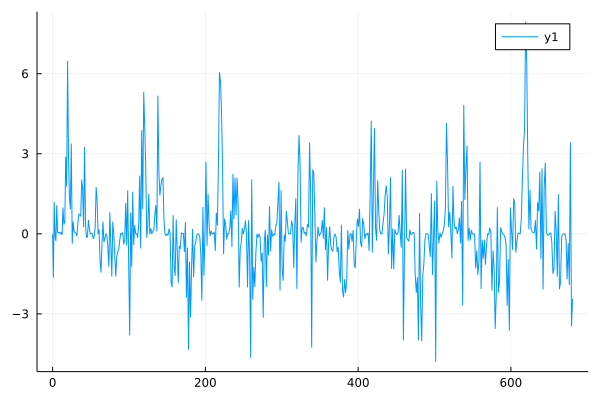

In [8]:
y = x .* (1 .+ cos.(2*pi*0.05*t))
plot(t,y)

At present, there is an issue where this multivariate routine gives fft-shifted results. Looking into it.

In [9]:
Sxy = bspec(t, hcat(x,y), W, K, 0.5, 0.0)

(MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}[MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.48, 0.482, 0.484, 0.48600000000000004, 0.488, 0.49, 0.492, 0.494, 0.49599999999999994, 0.498], [0.10589098429565307, 0.140037492371848, 0.5474143841923782, 3.700131320591818, 4.59560875155117, 4.6252064276274, 4.528254893698267, 4.149473518659337, 0.6044102850942776, 0.21990294543201552  …  0.13812292917947108, 0.1256177420795589, 0.12885030642971107, 0.10269384221725604, 0.1023672352744505, 0.04956551158811011, 0.06352999385132803, 0.08699442047910098, 0.08842712923408726, 0.16217079603993284], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.25543237325781554 - 2.973086078975303e-17im 0.06819557887640391 + 6.288300646399861e-17im … -0.23197262188684686 - 4.7475397169974537e-17im 0.3444191784598417 - 9.103224082346837e-17im; 0.06972294320249682 - 0.337229953006

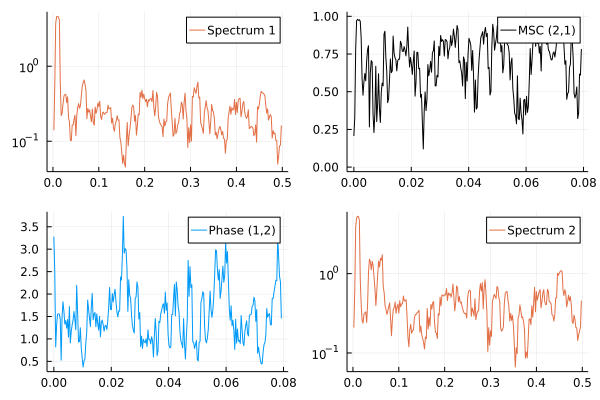

In [10]:
plot(Sxy)